In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/home/mehdi/github/LSSutils')
from lssutils.utils import histogram_cell
from glob import glob
from lssutils.dataviz import setup_color
import lssutils.utils as ut
from lssutils.stats.cl import AnaFast

In [2]:
setup_color()

In [11]:
#--- data
cl_dr9n = np.load('/home/mehdi/data/rongpu/imaging_sys/clustering/v2/cl_elg_bmzls_1024_noweight.npy', 
                  allow_pickle=True).item()

cl_dr9 = np.load('/home/mehdi/data/rongpu/imaging_sys/clustering/v2/cl_elg_bmzls_1024_nn.npy', 
                 allow_pickle=True).item()

lbins = np.arange(1, 1100, 51)

lb, cl_db = histogram_cell(cl_dr9['cl_gg']['cl'], bins=lbins)
cl_dbn = histogram_cell(cl_dr9n['cl_gg']['cl'], bins=lbins)[1]



#--- mocks
cl_files = glob('/home/mehdi/data/tanveer/mocks/clustering/clmock_*_elg_bmzls_1024_noweight.npy')
print(len(cl_files))
cl_gg_mock = []
cl_sg_mock = []



for fl in cl_files:
    cl_i = np.load(fl, allow_pickle=True).item()
    
    
    cl_gg_mock.append(histogram_cell(cl_i['cl_gg']['cl'], bins=lbins)[1])
    cl_sg_mock.append(histogram_cell(cl_i['cl_sg'][0]['cl'], bins=lbins)[1])
    print('.', end='')

1000
...................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

## Auto Power

Text(0.5, 1.0, 'Ratio of ELG $C_{\\ell}$ before to after mitigation')

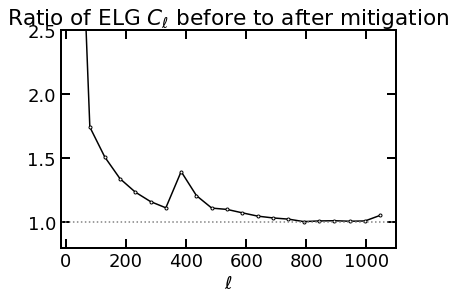

In [12]:
plt.plot(lb, cl_dbn/cl_db, 'k-', marker='.', mfc='w')

plt.axhline(1.0, ls=':', color='grey')
plt.ylim(0.8, 2.5)
plt.xlabel(r'$\ell$')
plt.title(r'Ratio of ELG $C_{\ell}$ before to after mitigation')

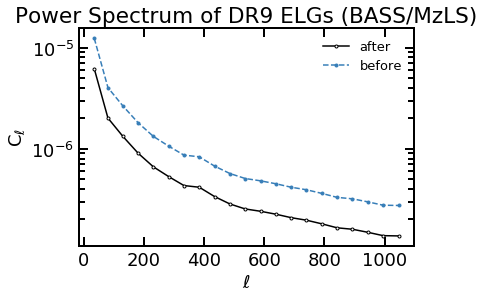

In [13]:
plt.semilogy(lb, cl_db, marker='.', mfc='w', label='after')
plt.semilogy(lb, 2*cl_db, marker='.', label='before')


# plt.axhline(1.0, ls=':', color='grey')
# plt.ylim(0.8, 2.5)
plt.xlabel(r'$\ell$')
plt.ylabel(r'C$_{\ell}$')
plt.title('Power Spectrum of DR9 ELGs (BASS/MzLS)')
plt.legend()

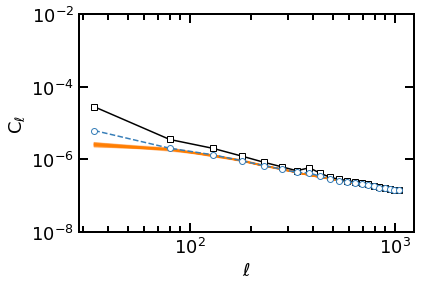

In [14]:
plt.plot(lb, cl_dbn, marker='s', mfc='w')
# plt.plot(cl_dr9n['cl_gg']['cl'], 'k-', alpha=0.2)


plt.plot(lb, cl_db, marker='o', mfc='w')
# plt.plot(cl_dr9['cl_gg']['cl'], 'k--', alpha=0.2)


# plt.loglog(np.mean(cl_mocks, axis=0), 'C1')
for cl_gg_mocki in cl_gg_mock[::10]:
    plt.plot(lb, cl_gg_mocki, 'C2', ls='-', alpha=0.1, lw=1, zorder=-10)


plt.ylim(1.0e-8, 1.0e-2)
plt.ylabel(r'C$_{\ell}$')
plt.xlabel(r'$\ell$')
plt.xscale('log')
plt.yscale('log')

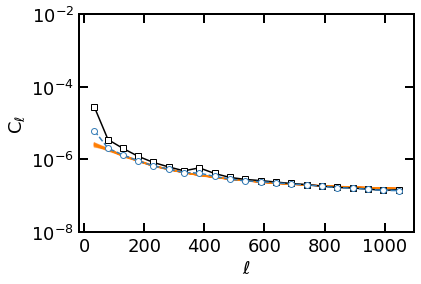

In [15]:
plt.plot(lb, cl_dbn, marker='s', mfc='w')
# plt.plot(cl_dr9n['cl_gg']['cl'], 'k-', alpha=0.2)


plt.plot(lb, cl_db, marker='o', mfc='w')
# plt.plot(cl_dr9['cl_gg']['cl'], 'k--', alpha=0.2)


# plt.loglog(np.mean(cl_mocks, axis=0), 'C1')
for cl_gg_mocki in cl_gg_mock[::10]:
    plt.plot(lb, cl_gg_mocki, 'C2', ls='-', alpha=0.1, lw=1, zorder=-10)


plt.ylim(1.0e-8, 1.0e-2)
plt.ylabel(r'C$_{\ell}$')
plt.xlabel(r'$\ell$')
# plt.xscale('log')
plt.yscale('log')

## Cross correlation

In [16]:
lb, clsg_db = histogram_cell(cl_dr9['cl_sg'][0]['cl'], bins=lbins)
clsg_dbn = histogram_cell(cl_dr9n['cl_sg'][0]['cl'], bins=lbins)[1]

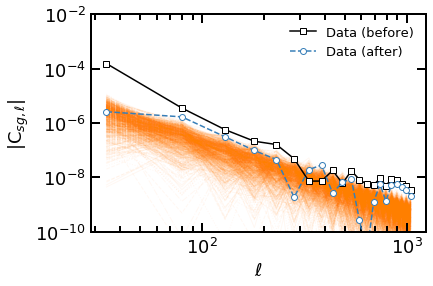

In [17]:
plt.plot(lb, abs(clsg_dbn), marker='s', mfc='w', label='Data (before)')
# plt.plot(abs(cl_dr9n['cl_sg'][0]['cl']), 'k-', alpha=0.2)


plt.plot(lb, abs(clsg_db), marker='o', mfc='w', label='Data (after)')
# plt.plot(abs(cl_dr9['cl_sg'][0]['cl']), 'k--', alpha=0.2)


# plt.loglog(np.mean(cl_mocks, axis=0), 'C1')
for cl_sg_mocki in cl_sg_mock:
    plt.plot(lb, abs(cl_sg_mocki), 'C2', alpha=0.05, lw=1, zorder=-10)


plt.ylim(1.0e-10, 1.0e-2)
plt.ylabel(r'|C$_{sg, \ell}$|')
plt.xlabel(r'$\ell$')
plt.xscale('log')
plt.yscale('log')
plt.legend()

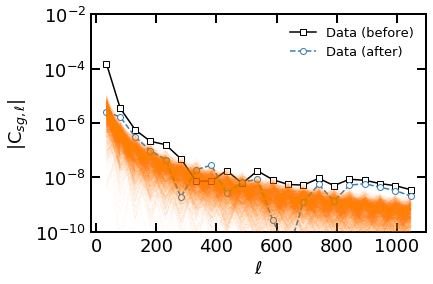

In [18]:
plt.plot(lb, abs(clsg_dbn), marker='s', mfc='w', label='Data (before)')
# plt.plot(abs(cl_dr9n['cl_sg'][0]['cl']), 'k-', alpha=0.2)


plt.plot(lb, abs(clsg_db), marker='o', mfc='w', label='Data (after)')
# plt.plot(abs(cl_dr9['cl_sg'][0]['cl']), 'k--', alpha=0.2)


# plt.loglog(np.mean(cl_mocks, axis=0), 'C1')
for cl_sg_mocki in cl_sg_mock:
    plt.plot(lb, abs(cl_sg_mocki), 'C2', alpha=0.05, lw=1, zorder=10)


plt.ylim(1.0e-10, 1.0e-2)
plt.ylabel(r'|C$_{sg, \ell}$|')
plt.xlabel(r'$\ell$')
# plt.xscale('log')
plt.yscale('log')
plt.legend()

(-153.55, 1100)

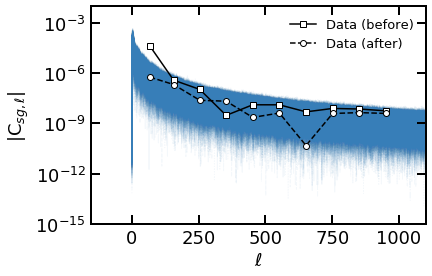

In [15]:
plt.plot(lb, abs(clsg_dbn), 'k-', marker='s', mfc='w', label='Data (before)')
# plt.plot(abs(cl_dr9n['cl_sg'][0]['cl']), 'k-', alpha=0.2)


plt.plot(lb, abs(clsg_db), 'k--', marker='o', mfc='w', label='Data (after)')
# plt.plot(abs(cl_dr9['cl_sg'][0]['cl']), 'k--', alpha=0.2)


# plt.loglog(np.mean(cl_mocks, axis=0), 'C1')
for cl_sg_mocki in cl_sg_mock:
    plt.plot(abs(cl_sg_mocki), 'C0', alpha=0.05, lw=1, zorder=-10)


plt.ylim(1.0e-15, 1.0e-2)
plt.ylabel(r'|C$_{sg, \ell}$|')
plt.xlabel(r'$\ell$')
# plt.xscale('log')
plt.legend()
plt.yscale('log')
plt.xlim(xmax=1100)

In [12]:
cl_input = np.load('/home/mehdi/data/tanveer/cl_th.npy', allow_pickle=True)
cl_input

array([1.73252145e-09, 6.26362833e-07, 1.00938458e-06, ...,
       5.62319686e-08, 5.62002981e-08, 5.61687590e-08])

In [13]:
cl_input.size

2048

## power of templates

In [14]:
import fitsio as ft

In [15]:
dt = ft.read('/home/mehdi/data/rongpu/imaging_sys/tables/nelg_features_bmzls_1024.fits')

In [16]:
Css = []
af = AnaFast()

nran = ut.make_hp(1024, dt['hpix'], dt['fracgood'])
mask = ut.make_hp(1024, dt['hpix'], 1.0) > 0.5

for i in range(13):
    sys_i = ut.make_hp(1024, dt['hpix'], dt['features'][:, i])
    del_i = ut.make_overdensity(sys_i, nran, mask, is_sys=True)
    Css.append(af(sys_i, nran, mask))
    print('.', end='')

.............

In [17]:
ut.maps_dr9

['EBV',
 'STARDENS',
 'galdepth_rmag_ebv',
 'galdepth_gmag_ebv',
 'galdepth_zmag_ebv',
 'psfdepth_rmag_ebv',
 'psfdepth_gmag_ebv',
 'psfdepth_zmag_ebv',
 'psfdepth_w1mag_ebv',
 'psfdepth_w2mag_ebv',
 'PSFSIZE_R',
 'PSFSIZE_G',
 'PSFSIZE_Z']

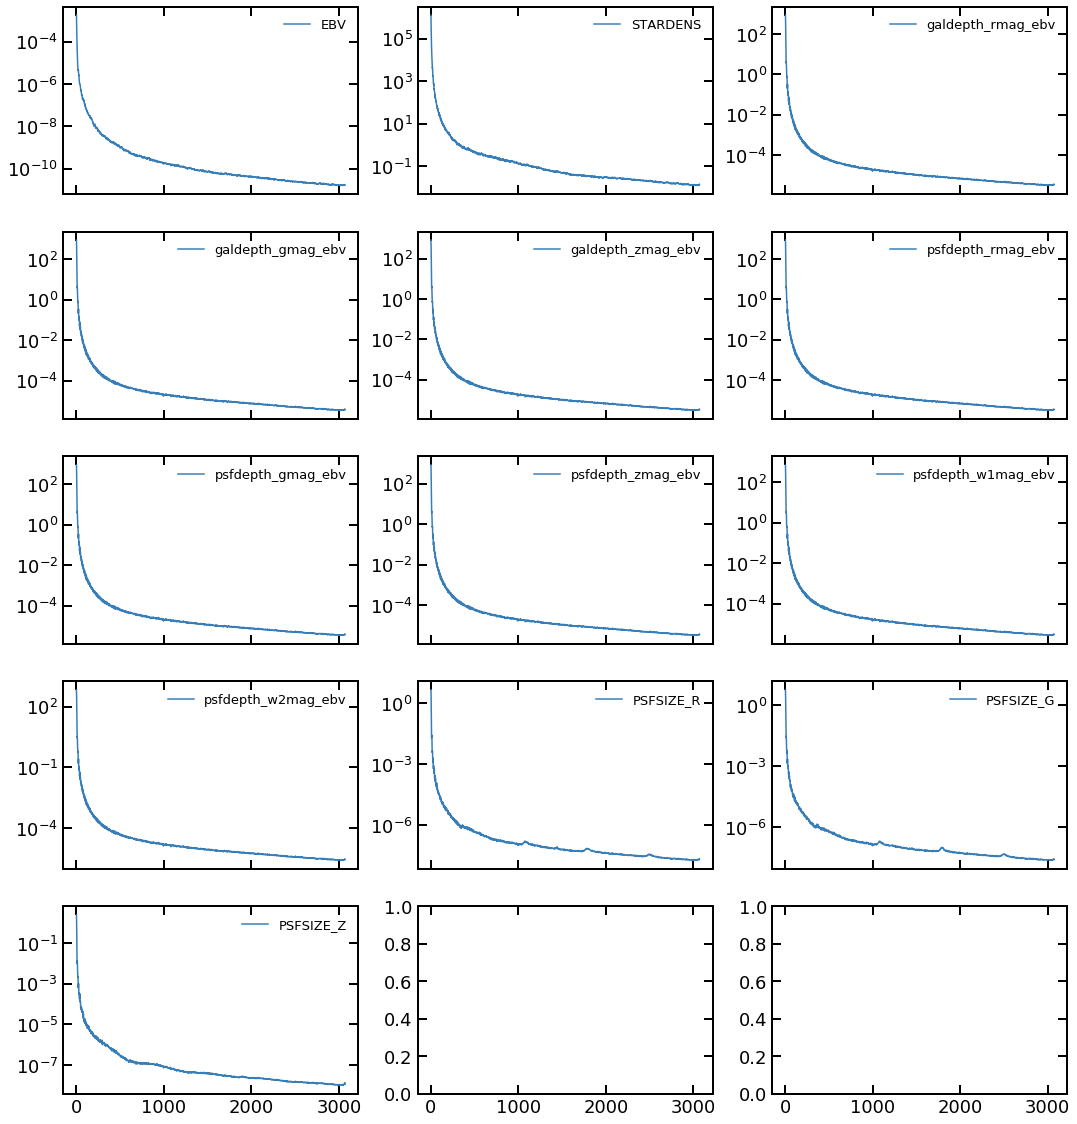

In [18]:
fg, ax = plt.subplots(ncols=3, nrows=5, figsize=(18, 20), sharex=True)
ax = ax.flatten()

for i, css in enumerate(Css):
    ax[i].semilogy(css['cl'], label=ut.maps_dr9[i])
    ax[i].legend()

In [97]:
def bin_cls(cl_gg, cl_ss, cl_sg):
    
    lbins = np.arange(1, 3073, 200)
    
    lb, cl_gg_ = histogram_cell(cl_gg, bins=lbins)
    cl_ss_ = histogram_cell(cl_ss, bins=lbins)[1]
    cl_sg_ = histogram_cell(cl_sg, bins=lbins)[1]
    
    cl_r = cl_sg**2 #np.sqrt(cl_gg*cl_ss)
    cl_r_ = cl_sg_**2 #np.sqrt(cl_gg_*cl_ss_) 
    return lb, cl_r_, cl_r

def plot(cl_gg, cl_ss, cl_sg, **kw):
    
    lb, cl_r_, cl_r = bin_cls(cl_gg, cl_ss, cl_sg)
    
    label=kw.pop('label')
    plt.plot(cl_r, alpha=0.05, **kw)
    plt.plot(lb, cl_r_, mfc='w', marker='o', label=label, **kw)

In [92]:
cl_r = []


for mi in cl_mocks:
    
    lb, cl_i, _ = bin_cls(cl_dr9['cl_gg']['cl'], cl_dr9['cl_ss'][0]['cl'], mi['cl_sg'][0]['cl'])
    cl_r.append(cl_i)
    print('.', end='')
    
cmin, cmedian, cmax = np.percentile(cl_r, [0, 50, 100], axis=0)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

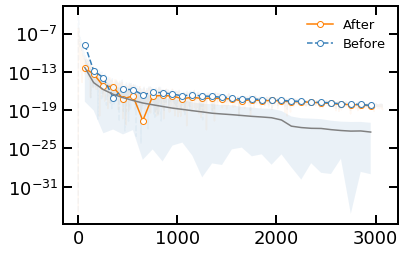

In [96]:
plot(cl_dr9['cl_gg']['cl'], cl_dr9['cl_ss'][0]['cl'], cl_dr9['cl_sg'][0]['cl'],
     color='C1', ls='-', label='After')
plot(cl_dr9n['cl_gg']['cl'], cl_dr9n['cl_ss'][0]['cl'], cl_dr9n['cl_sg'][0]['cl'],
     color='C0', ls='--', label='Before')

plt.plot(lb, cmedian, ls='-', color='grey')
plt.fill_between(lb, cmin, cmax, alpha=0.1)


# plt.axhline(0.0, ls=':', lw=1, color='k')
# plt.ylim(-5, 5)
plt.legend()
plt.yscale('log')
# plt.xscale('log')

In [25]:
cl_dr9['cl_gg']['cl'].size

3072